In [1]:
import os
import json
import pandas as pd
from collections import Counter  

from helpers import open_srt, tokenize_subtittle
from models import init_db, Movie
from cfg import DB_PATH

init_db(DB_PATH)

In [4]:
movies = Movie.select()

In [5]:
all_words = []
words_count = []
movies_count = []

for m in  movies:    
    with open(m.srt_file) as srt_file:
        subtitles = open_srt(srt_file)

    words = ' '.join(map(tokenize_subtittle, subtitles))
    counter = Counter(words.split(' '))
    all_words += list(counter.keys())
    words_count += list(counter.values())
    movies_count += [1] * len(counter)

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [4]:
words_df = pd \
    .DataFrame(data={'word': all_words, 'count': words_count, 'movies_count': movies_count}) \
    .groupby(['word']) \
    .sum()
words_df['presence'] = words_df.movies_count / len(movies)

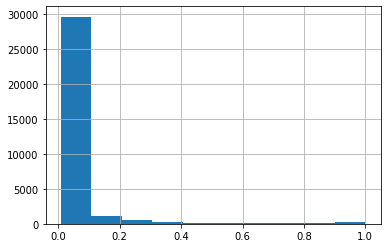

In [5]:
fig = words_df.presence.hist(bins=10)

In [6]:
THRESHOLD = .4
stop_words_df = words_df[words_df.presence > THRESHOLD]
stop_words = list(stop_words_df.index) 
with open("stop_words.json", "w") as json_file:
    json.dump(stop_words, json_file)

### Trying to improve this.



In [8]:
TWO_POPES_IMDB_ID = '8404614'
two_popes_movie = movies.where(Movie.imdb_id == TWO_POPES_IMDB_ID).first()

In [10]:
with open(two_popes_movie.srt_file) as srt_file:
    subtitles = open_srt(srt_file)

tp_words = ' '.join(map(tokenize_subtittle, subtitles))
tp_counter = Counter(words.split(' '))

In [13]:
max(tp_counter.values())

326